In [ ]:
!pip install sklearn pillow

In [36]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Split dataset 3:1

filename = 'train.csv'
filename_to1 = 'train.csv'
filename_to2 = 'validation.csv'
from_label = 'class_number'

df = pd.read_csv(filename)
x = df.class_number
y = df.drop(from_label, axis=1)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, random_state=42
)
train = pd.concat([y_train, x_train], axis=1)
train.to_csv(filename_to1, index=False)
test = pd.concat([y_test, x_test], axis=1)
test.to_csv(filename_to2, index=False)

In [38]:
!mkdir train
!mkdir validation
!mkdir test

In [41]:
import pandas as pd
import shutil as sh

# Copy files according to csv

filename = 'validation.csv'
path_from = 'dataset/'
path_to = 'validation/'
name_label = 'filename'
pic_format = '.png'

df = pd.read_csv(filename)
new_data = []
for index, row in df.iterrows():
    new_name = str(index).zfill(6) + pic_format
    sh.copyfile(path_from + row[name_label], path_to + new_name)
    row[name_label] = new_name
    new_data.append(row)
pd.DataFrame(new_data, columns=list(df.columns)).to_csv(filename, index=False)

In [ ]:
!rm -r old_train
!rm gt_train.csv
!mv gt_test.csv test.csv

In [ ]:
import pandas as pd
import numpy as np

# Make csv with condition column

filename = 'validation.csv'
from_label = 'class_number'
new_label = 'is_forward'
criteria = 57

df = pd.read_csv(filename)
df[new_label] = np.where(df[from_label] == criteria, 1, 0)
df.to_csv(filename, index=False)

In [ ]:
!mkdir dataset
!cp -r train/ dataset/
!cp -r validation/ dataset/
!cp -r test/ dataset/

In [ ]:
!tar -cvpJf dataset.tar.xz dataset

In [ ]:
!mv train old_train
!mv train.csv old_train.csv

In [50]:
import pandas as pd
import shutil as sh

# Merges 2 csv's into one, also merges their directiories

files = ['old_train.csv', 'validation.csv']
paths_from = ['old_train/', 'validation/']
path_to = 'train/'
new_filename = 'train.csv'
name_label = 'filename'
pic_format = '.png'

offset = 0
data = []
for file, path in zip(files, paths_from):
    df = pd.read_csv(file)
    for index, row in df.iterrows():
        new_name = str(offset + index).zfill(6) + pic_format
        sh.copyfile(path + row[name_label], path_to + new_name)
        row[name_label] = new_name
        data.append(row)
    offset = len(data)
pd.DataFrame(data).to_csv(new_filename,  index=False)

In [87]:
import pandas as pd
import collections as cs

# Makes csv with data distribution by classes

filename = 'total_train.csv'
new_filename = 'train_count.csv'
label = 'class_number'

df = pd.read_csv(filename)
cr = cs.Counter(df[label].values)
new_df = pd.DataFrame.from_dict(cr, orient='index').reset_index()
new_df.columns = (label, 'count')
new_df.to_csv(new_filename, index=False)

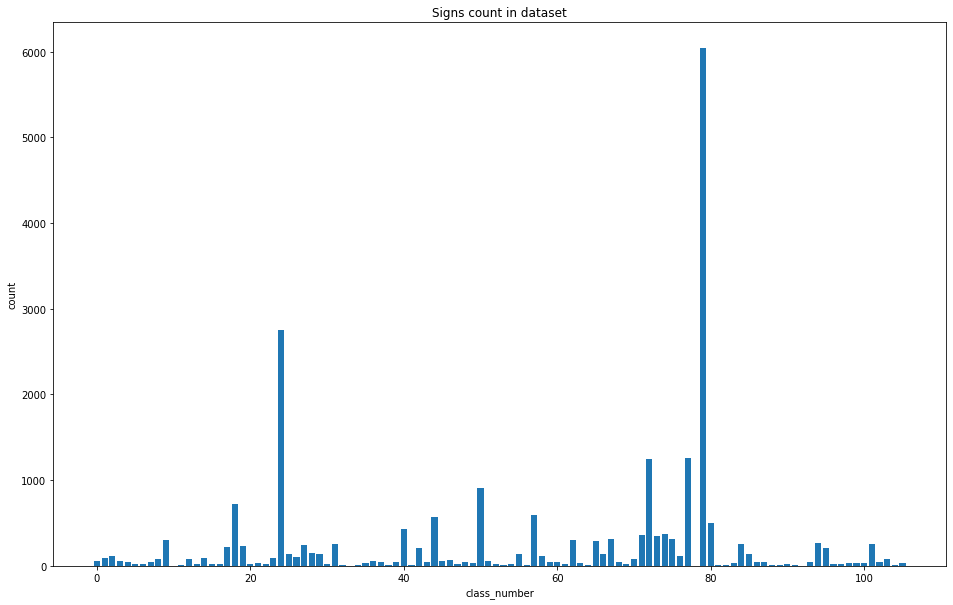

In [74]:
import matplotlib.pyplot as plt
import pandas as pd

# Plots data distribution by classes

filename = 'test_count.csv'
plot_filename = 'plot_t.png'
first_label = 'class_number'
second_label = 'count'
plot_name = 'Signs count in dataset'

df = pd.read_csv(filename)
plt.figure(figsize=(16,10))
plt.bar(df[first_label], height=df[second_label])
plt.yscale('log')
plt.ylabel(second_label)
plt.xlabel(first_label)
plt.title(plot_name)
plt.savefig(plot_filename)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Plots pie data distrubution by classes

filename = 'classes_count.csv'
plot_filename = 'results/class_distribution.png'
first_label = 'class_number'
second_label = 'count'
plot_name = 'Signs count in dataset'

df = pd.read_csv(filename)
plt.figure(figsize=(16,16))
plt.title(plot_name, size=12)
plt.pie(df[second_label], labels=df[first_label])
plt.savefig(plot_filename)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Plots train accuracy & loss

filename = 'results/2019-09-27_13-37-53.csv'

df = pd.read_csv(filename)
ep = list(range(df.shape[0]))
fig, axs = plt.subplots(nrows=2, figsize=(12,12))
fig.suptitle('Model report', size=22)
axs[0].plot(df['acc'])
axs[0].set_title('Model accuracy', size=16)
axs[0].grid(linewidth=1, linestyle='--')
axs[0].set_ylabel('Loss')
axs[0].set_xlabel('Epoch')
axs[1].plot(df['loss'])
axs[1].set_title('Model loss', size=16)
axs[1].grid(linewidth=1, linestyle='--')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')
fig.savefig('results/train_report.png')

In [ ]:
import pandas as pd

# Makes dictionary with class weights

filename = 'classes_count.csv'
name_label = 'class_number'
count_label = 'count'

df = pd.read_csv(filename)
mean = df[count_label].sum() / len(df.index)
data = {row[name_label]: mean / row[count_label] for i, row in df.iterrows()}

In [ ]:
!rm -rf results/*
!mkdir results/tb_logs
!mkdir results/models

# Классификатор А1 (106 классов, 375 эпох)
### Архитектура
```
Model: "sequential_1"
_________________________________________________________________
Layer (type) Output Shape Param #
=================================================================
conv2d_1 (Conv2D) (None, 45, 45, 64) 3136
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 64) 0
_________________________________________________________________
conv2d_2 (Conv2D) (None, 20, 20, 80) 46160
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 80) 0
_________________________________________________________________
conv2d_3 (Conv2D) (None, 8, 8, 96) 69216
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 96) 0
_________________________________________________________________
conv2d_4 (Conv2D) (None, 2, 2, 112) 96880
_________________________________________________________________
flatten_1 (Flatten) (None, 448) 0
_________________________________________________________________
dropout_1 (Dropout) (None, 448) 0
_________________________________________________________________
dense_1 (Dense) (None, 192) 86208
_________________________________________________________________
dropout_2 (Dropout) (None, 192) 0
_________________________________________________________________
dense_2 (Dense) (None, 106) 20458
=================================================================
Total params: 322,058
Trainable params: 322,058
Non-trainable params: 0
_________________________________________________________________
```
### Графики loss и accuracy
<img src="results/train_report.png">

#### 300 эпоха:
Loss на тестовом наборе: 0.790338609995404

Accuracy на тестовом наборе: 0.948959979501115

Prediction на 12 знаках:

```
[[9, 1.0], # неверно - 8
[31, 1.0],
[77, 1.0],
[44, 1.0],
[79, 1.0],
[50, 1.0],
[50, 1.0], # неверно - 55
[79, 1.0],
[65, 1.0],
[103, 1.0],
[80, 1.0],
[79, 1.0]]
```

#### 150 эпоха:
Loss на тестовом наборе: 0.1956598465714981

Accuracy на тестовом наборе: 0.9695041216443687

Prediction на 12 знаках:
```
[[9, 0.82056755], # неверно - 8
[31, 1.0],
[77, 1.0],
[44, 1.0],
[79, 1.0],
[50, 1.0],
[79, 0.8495217],  # неверно - 55
[79, 1.0],
[65, 1.0],
[103, 1.0],
[80, 1.0],
[79, 1.0]]
```